# Data Visualizations

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import sqlite3
from sqlite3 import Error
import pandas as pd
import math
%matplotlib inline

In [2]:
database = r"db_files\spotify.db"

# Connection to database
conn = sqlite3.connect(database)

## 7.1 Visualization 1: Feature Correlations

In [6]:
viz_query = ("""
    SELECT tf.danceability
    , tf.energy
    , tf.instrumentalness
    , tf.liveness
    , tf.loudness
    , tf.speechiness
    , tf.tempo
    , tf.valence
    FROM track_feature AS tf
    """)
df_track_feature = pd.read_sql(viz_query, conn)
df_track_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1930 non-null   float64
 1   energy            1930 non-null   float64
 2   instrumentalness  1930 non-null   float64
 3   liveness          1930 non-null   float64
 4   loudness          1930 non-null   float64
 5   speechiness       1930 non-null   float64
 6   tempo             1930 non-null   float64
 7   valence           1930 non-null   float64
dtypes: float64(8)
memory usage: 120.8 KB


Text(0.5, 1.0, 'Correlation Heatmap Between Song Features')

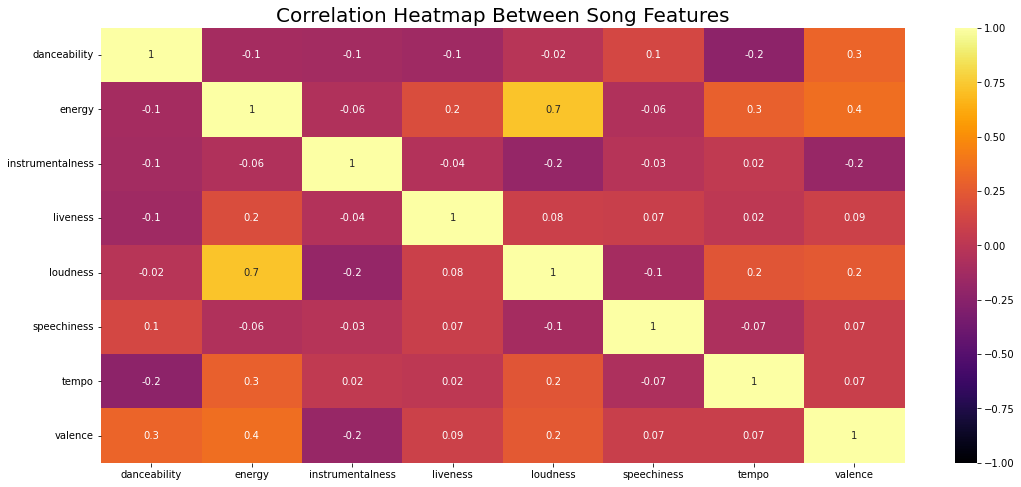

In [66]:
# Get the correlation values for all numerical columns
df_corr = df_track_feature.corr(method="pearson")

# Set visualization size
plt.figure(figsize=(18,8))

# Define visualization
corr_visual = sns.heatmap(df_corr, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno")

corr_visual.set_title("Correlation Heatmap Between Song Features", fontsize=20)

The above visualization is a heatmap which has the r value describing the correlation between all numerical track features. In this case, perfect positive correlation is light yellow and negative correlation is black. As expected, each feature is positively correlated with itself.

Most values have little to no correlation with each other, but there is a strong correlation between energy and loudness. This makes since because one can imagine that a louder song can make it feel more energetic. There is also some correlation between tempo and energy as well.

The following visualization complements the previous one. It gives a visual depiction of the correlation, while the above gives a numerical value to the correlation.

Text(0.5, 1.04, 'Scatter plots of Track Features')

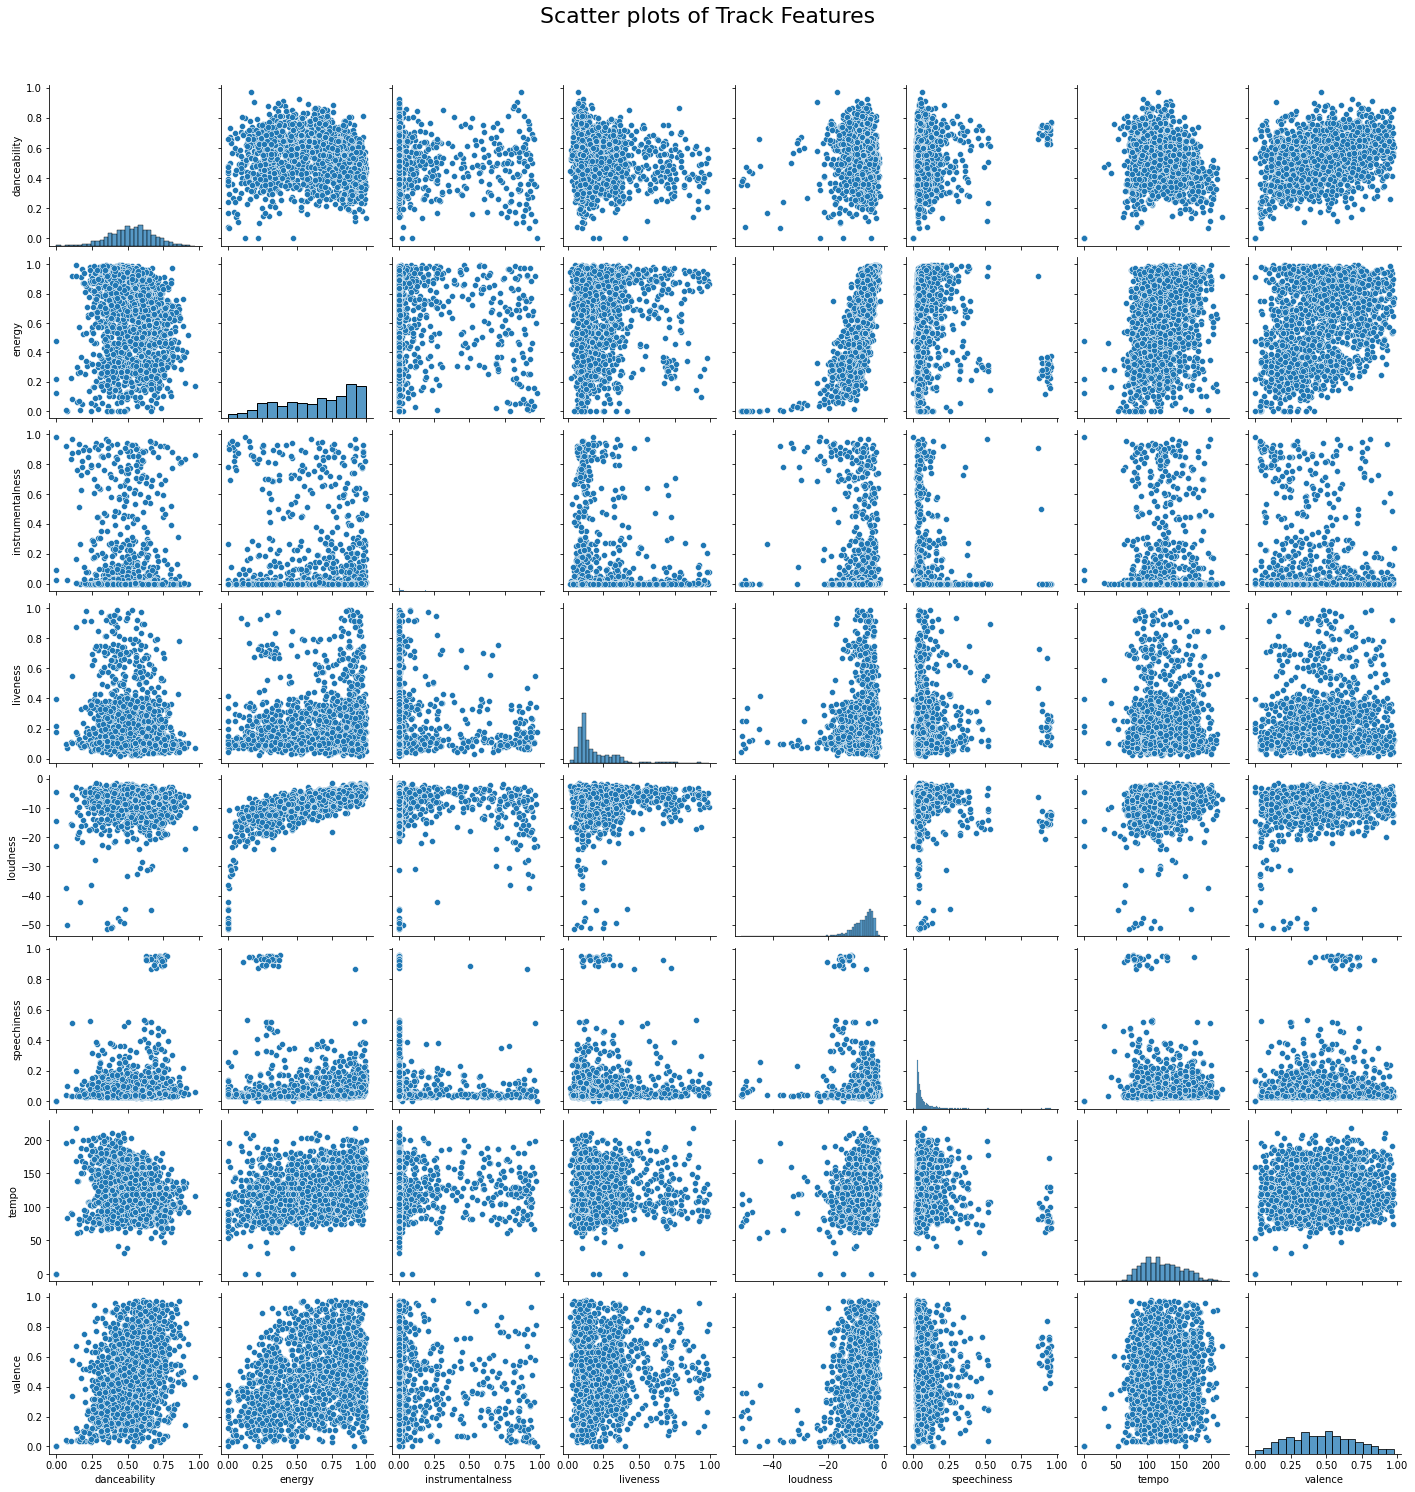

In [50]:
# using pairplot from the seaborn package
# A visual representation of the correlations

z = sns.pairplot(data = df_track_feature, palette = 'mako')

# plot title
z.fig.suptitle("Scatter plots of Track Features", y=1.04, fontsize=22)

Text(0.5, 1.04, 'Scatter plots of Track Features')

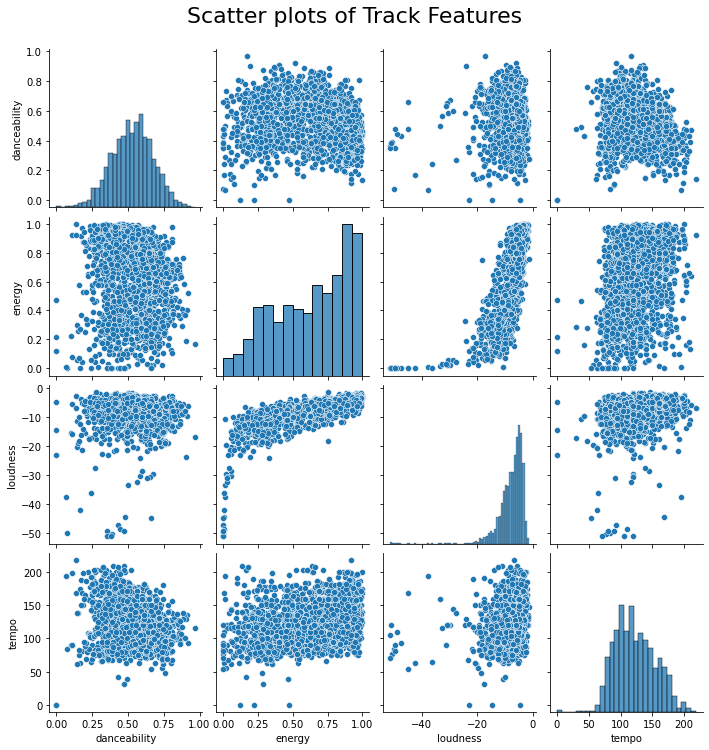

In [49]:
# a sumbset of the track features with only the numerical data
# matching the previous discussion
df_track_feature_reduced = df_track_feature[['danceability', 'energy', 
                                    'loudness', 'tempo']]

# using pairplot from the seaborn package, there might be correlations between some of the features that will be revealed

x = sns.pairplot(data = df_track_feature_reduced, palette = 'mako')

# plot title
x.fig.suptitle("Scatter plots of Track Features", y=1.04, fontsize=22)

## 7.2 Visualization 2: Track Feature Distributions

In [9]:
viz_query = ("""
    SELECT a.artist_name
    , tf.danceability
    , tf.energy
    , tf.instrumentalness
    , tf.liveness
    , tf.loudness
    , tf.speechiness
    , tf.tempo
    , tf.valence
    FROM artist AS a
    JOIN album AS al
        ON a.artist_id = al.artist_id
    JOIN track AS t
        ON al.album_id = t.album_id
    JOIN track_feature AS tf
        ON t.track_id = tf.track_id
    """)
art_album = pd.read_sql(viz_query, conn)
art_album.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       1930 non-null   object 
 1   danceability      1930 non-null   float64
 2   energy            1930 non-null   float64
 3   instrumentalness  1930 non-null   float64
 4   liveness          1930 non-null   float64
 5   loudness          1930 non-null   float64
 6   speechiness       1930 non-null   float64
 7   tempo             1930 non-null   float64
 8   valence           1930 non-null   float64
dtypes: float64(8), object(1)
memory usage: 135.8+ KB


<Figure size 800x480 with 0 Axes>

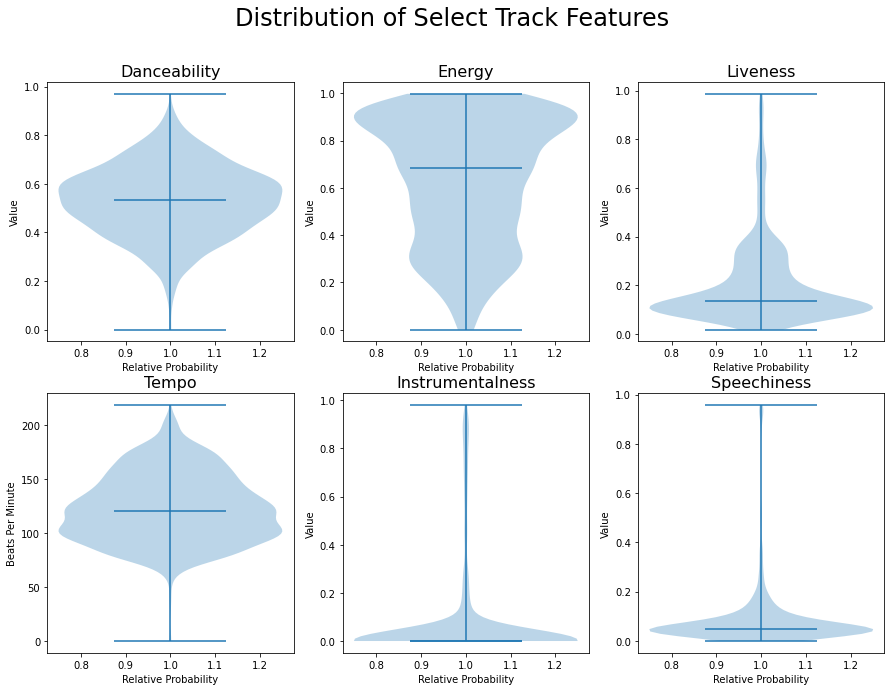

In [84]:

figure(figsize=(10, 6), dpi=80)
 
# Create figure with three axes
fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(15, 10.5)
# Plot violin plot on axes 1
ax1.violinplot(art_album.danceability, showmedians=True)
ax1.set_title('Danceability', fontsize=16)
ax1.set_ylabel('Value')
ax1.set_xlabel('Relative Probability')

# Plot violin plot on axes 2
ax2.violinplot(art_album.energy, showmedians=True)
ax2.set_title('Energy', fontsize=16)
ax2.set_ylabel('Value')
ax2.set_xlabel('Relative Probability')

# Plot violin plot on axes 3
ax3.violinplot(art_album.liveness, showmedians=True)
ax3.set_title('Liveness', fontsize=16)
ax3.set_ylabel('Value')
ax3.set_xlabel('Relative Probability')

# Plot violin plot on axes 3
ax4.violinplot(art_album.tempo, showmedians=True)
ax4.set_title('Tempo', fontsize=16)
ax4.set_ylabel('Beats Per Minute')
ax4.set_xlabel('Relative Probability')

# Plot violin plot on axes 3
ax5.violinplot(art_album.instrumentalness, showmedians=True)
ax5.set_title('Instrumentalness', fontsize=16)
ax5.set_ylabel('Value')
ax5.set_xlabel('Relative Probability')

# Plot violin plot on axes 3
ax6.violinplot(art_album.speechiness, showmedians=True)
ax6.set_title('Speechiness', fontsize=16)
ax6.set_ylabel('Value')
ax6.set_xlabel('Relative Probability')

fig.suptitle('Distribution of Select Track Features', fontsize=24)


plt.show()

Some of the features have a typical normal apearence in their distribution, but the features Instrumentalness and Speechiness are very concentrated on the lower end of the scale with outliers on the top of the scale. There are likely a few intramental tracks and atleast one track that is with little supporting music according to these distributions.


## 7.3 Data Visualization 3: Trends Over Years

In [11]:
avg_query = ("""
    SELECT al.release_date
    , avg(t.duration_ms)/60000 AS avg_duration_min
    , avg(tf.danceability) AS avg_dance
    , avg(tf.energy) AS avg_energy
    , avg(tf.liveness) AS avg_live
    , avg(tf.tempo) AS avg_tempo
    FROM album AS al
    JOIN track AS t
        ON al.album_id = t.album_id
    JOIN track_feature AS tf
        ON t.track_id = tf.track_id
    GROUP BY al.release_date
    """)

album_avg = pd.read_sql(avg_query, conn)
album_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   release_date      135 non-null    object 
 1   avg_duration_min  135 non-null    float64
 2   avg_dance         135 non-null    float64
 3   avg_energy        135 non-null    float64
 4   avg_live          135 non-null    float64
 5   avg_tempo         135 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.5+ KB


In [13]:
album_avg['year'] = pd.DatetimeIndex(album_avg['release_date']).year

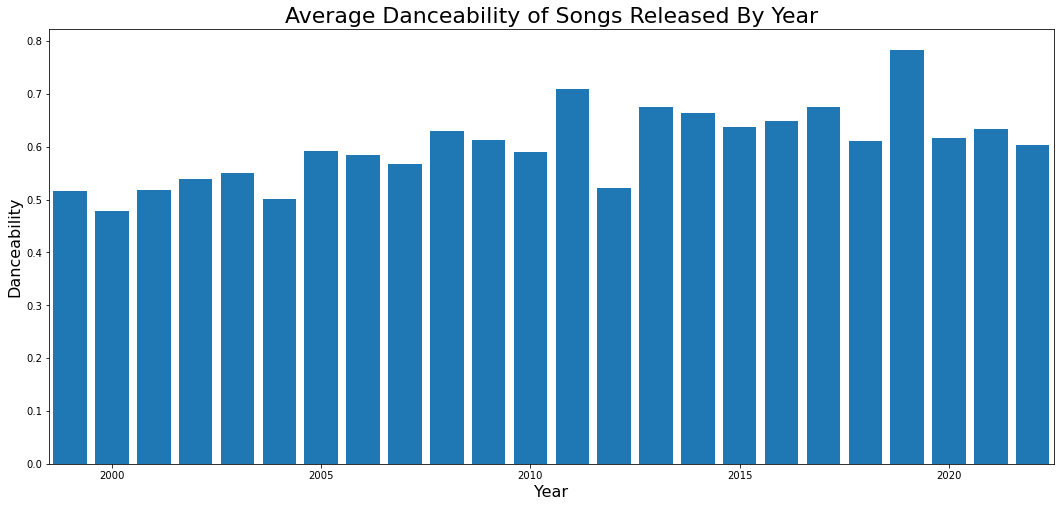

In [69]:
# figure size
fig, ax = plt.subplots(figsize=(18, 8))

# plot data
plt.bar(album_avg['year'], album_avg['avg_dance'])

# plot labels and titles
plt.title('Average Danceability of Songs Released By Year', fontsize=22)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Danceability", fontsize=16)

# x-axis limit
plt.xlim([1998.5, 2022.5])


plt.show()

In [27]:
avg_query = ("""
    SELECT al.release_date
    , tf.danceability
    FROM album AS al
    JOIN track AS t
        ON al.album_id = t.album_id
    JOIN track_feature AS tf
        ON t.track_id = tf.track_id
    """)

dance_year = pd.read_sql(avg_query, conn)

dance_year['year'] = pd.DatetimeIndex(dance_year['release_date']).year
dance_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_date  1930 non-null   object 
 1   danceability  1930 non-null   float64
 2   year          1930 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 45.4+ KB


In [31]:
dance_year_2018 = dance_year[dance_year['year'] == 2018]
dance_year_2019 = dance_year[dance_year['year'] == 2019]
dance_year_2020 = dance_year[dance_year['year'] == 2020]

In [35]:
mean_2018 = round(dance_year_2018['danceability'].mean(), 3)
std_2018 = round(dance_year_2018['danceability'].std(), 3)
count_2018 = dance_year_2018['danceability'].count()

mean_2019 = round(dance_year_2019['danceability'].mean(), 3)
std_2019 = round(dance_year_2019['danceability'].std(), 3)
count_2019 = dance_year_2019['danceability'].count()

mean_2020 = round(dance_year_2020['danceability'].mean(), 3)
std_2020 = round(dance_year_2020['danceability'].std(), 3)
count_2020 = dance_year_2020['danceability'].count()

In [40]:
print("In the year 2018 danceability was " + str(mean_2018) + " +- " + str(std_2018) + " for " + str(count_2018) + " tracks")
print("In the year 2019 danceability was " + str(mean_2019) + " +- " + str(std_2019) + " for " + str(count_2019) + " tracks")
print("In the year 2020 danceability was " + str(mean_2020) + " +- " + str(std_2020) + " for " + str(count_2020) + " tracks")

In the year 2018 danceability was 0.538 +- 0.134 for 83 tracks
In the year 2019 danceability was 0.624 +- 0.174 for 92 tracks
In the year 2020 danceability was 0.56 +- 0.123 for 102 tracks


The p valued between the years of 2019 and 2020 are 0.6429 and 0.0306. The drop between the years of 2019 and 2020 are statistically different. It is interesting to see how major world events like a global pandemic can possibly impact the music we listen to! But It is to important to note that the results from 2020 are consistant with those in 2018. So it is likely that dance music was just really popular in 2019.

In [21]:
query = ("""
SELECT artist_name
        , song_name
        , duration_ms
FROM
    (SELECT a.artist_name
    , t.song_name
    , t.duration_ms
    ,Row_Number()
    over (Partition BY a.artist_name
    ORDER BY t.duration_ms DESC ) AS Rank
    FROM artist AS a
    JOIN album AS al
        ON a.artist_id = al.artist_id
    JOIN track AS t
        ON al.album_id = t.album_id) AS temp_rank
WHERE RANK <= 10
ORDER BY artist_name ASC, duration_ms DESC
    """)



df = pd.read_sql(query, conn)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  200 non-null    object
 1   song_name    200 non-null    object
 2   duration_ms  200 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [22]:
df.head(200)

,artist_name,song_name,duration_ms
0,Adele,To Be Loved,403961
1,Adele,Love Is A Game,403044
2,Adele,My Little Love,389107
3,Adele,I Drink Wine,376169
4,Adele,Hold On,366004
...,...,...,...
195,the GazettE,体温,395880
196,the GazettE,Taion,377000
197,the GazettE,D.L.N,375800
198,the GazettE,D.L.N,371626
